In [5]:
# Distribution especially binomial distribution (where there can be only two values 0 or 1) 
# e.g. flip of a coin
# chances of getting number greater than or equal to 15 when 
# flipping a coin 20 times. Simulate this over 10000 iterations

import numpy as np
x = np.random.binomial(20, 0.5, 10000)
len(x[x >= 15])

179

In [8]:
# to get a mean
print((x >= 15).mean())

0.0179


In [12]:
count = 0
for i in x:
    if i >= 15:
        count += 1
print(count)
print("mean: {}".format(count/10000))

179
mean: 0.0179


In [18]:
count_of_15_occurring_two_time_consecutively = 0
for i in range(len(x) - 1):
    if x[i] >= 15 & x[i + 1] >= 15:
        count_of_15_occurring_two_time_consecutively += 1
        
print("{} chances of 15 occurring consecutively 2 times in 10000 iteration".format(count_of_15_occurring_two_time_consecutively))

5 chances of 15 occurring consecutively 2 times in 10000 iteration


In [21]:
y = [1, 2, 6]
np.mean(y)

3.0

In [23]:
# Uniform distribution
np.random.uniform(0, 1)

0.8414249306086966

In [24]:
np.random.normal(0.75)

-0.16315330431777442

In [26]:
# Calculate std deviation with out using inbuilt function std
distribution = np.random.normal(0.75,size=1000)
np.sqrt(np.sum((distribution.mean() - distribution)**2)/len(distribution))

0.9977870903864146

In [27]:
np.std(distribution)

0.9977870903864146

In [35]:
## Measure -  kurtosis provides how tail of the distribution works
# negative value of kurtosis indicates curve is more flat
# positive value of kurtosis indicates curve is more peaky
import scipy.stats as stats
stats.kurtosis(distribution)
stats.skew(distribution)

-0.09361571940166867

In [29]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [30]:
distribution.sort()

In [32]:
dmean = distribution.mean()
dmean

0.7321191933475688

In [33]:
dstd = distribution.std()
dstd

0.9977870903864144

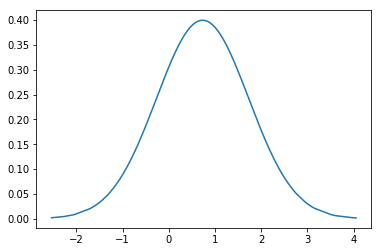

In [34]:
pdf = stats.norm.pdf(distribution, dmean, dstd)
plt.plot(distribution, pdf)

In [39]:
# another distribution is chi squared (X**2) distrbution.
# left skewed distribution
# take in only degree of freedom parameter. 
chi_squared_df2 = np.random.chisquare(2, size=1000)
stats.skew(chi_squared_df2)

2.310136589743042

In [38]:
## Higher the degree of freedom the skew tends to move towards the center. 
chi_squared_df5 = np.random.chisquare(5, size=1000)
stats.skew(chi_squared_df5)

1.0975478473634017

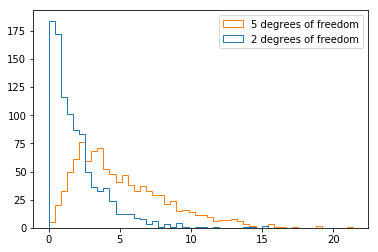

In [40]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')


In [42]:
## Basis of hypothesis testing
## T test is one way to compare mean between two different population
## result of T test is tuple (test statistics, p-value)
# depending on p-value we can and cannot reject null hypothesis 
from scipy import stats
stats.ttest_ind()

In [77]:
import pandas as pd
with open('university_towns.txt', mode='r') as f:
    lines = [line.strip() for line in f.readlines() if line.strip() != '']
    stRowIndex = [lines.index(line) for line in lines if '[edit]' in line]
    universityStateAndTowns = []
    #stateName = [lines[i].replace('[edit]', '') for i in stRowIndex]
    for i in range(0, len(stRowIndex)):
        stateName = lines[stRowIndex[i]].replace('[edit]', '')
        if i != len(stRowIndex) - 1:
            sub = [line[:line.find('(')].strip() for line
                   in lines[stRowIndex[i] + 1:stRowIndex[i + 1]]
                   if line.find('(') > 0]
            sub1 = [line.strip() for line
                    in lines[stRowIndex[i] + 1:stRowIndex[i + 1]]
                    if line.find('(') < 0]
            if len(sub) > 0:
                universityStateAndTowns.append([stateName, sub])
            if len(sub1) > 0:
                universityStateAndTowns.append([stateName, sub1])
        else:
            sub = [line[:line.find('(')].strip() for line in lines[stRowIndex[i] + 1:] if line.find('(') > 0]
            sub1 = [line.strip() for line
                    in lines[stRowIndex[i] + 1:]
                    if line.find('(') < 0]
            if len(sub) > 0:
                universityStateAndTowns.append([stateName, sub])
            if len(sub1) > 0:
                universityStateAndTowns.append([stateName, sub1])

pd.DataFrame(universityStateAndTowns, columns=['State', 'RegionName'])
#pd.DataFrame.from_dict(uni.items(),  columns=['State', 'RegionName'])



,State,RegionName
0,Alabama,"[Auburn, Florence, Jacksonville, Livingston, M..."
1,Alaska,[Fairbanks]
2,Arizona,"[Flagstaff, Tempe, Tucson]"
3,Arkansas,"[Arkadelphia, Conway, Fayetteville, Jonesboro,..."
4,California,"[Angwin, Arcata, Berkeley, Chico, Claremont, C..."
5,Colorado,"[Alamosa, Boulder, Durango, Fort Collins, Gold..."
6,Connecticut,"[Fairfield, Middletown, New Britain, New Haven..."
7,Delaware,"[Dover, Newark]"
8,Florida,"[Ave Maria, Boca Raton, Coral Gables, DeLand, ..."
9,Georgia,"[Albany, Athens, Atlanta, Carrollton, Demorest..."


In [102]:
GDP = pd.read_excel('gdplev.xls', skiprows=219)
GDP = GDP[['1999q4', 9926.1]]
GDP.rename(columns={'1999q4': 'Quarterly', 9926.1: 'GDP'}, inplace=True)


In [113]:
GDP.head()

,Quarterly,GDP
0,2000q1,10031.0
1,2000q2,10278.3
2,2000q3,10357.4
3,2000q4,10472.3
4,2001q1,10508.1


In [115]:
for i in range(2, len(GDP) - 1):
    if (GDP.loc[i - 2, 'GDP'] > GDP.loc[i - 1, 'GDP']) & (GDP.loc[i - 1, 'GDP'] > GDP.loc[i, 'GDP']):
        print(GDP.loc[i-2, 'Quarterly'])
        break

2008q3


In [124]:
indexRecessionStart = GDP[GDP['Quarterly'] == '2008q3'].index[0]

for i in range(indexRecessionStart, len(GDP) - 1):
    if (GDP.loc[i + 2, 'GDP'] > GDP.loc[i + 1, 'GDP']) & (GDP.loc[i + 1 , 'GDP'] > GDP.loc[i, 'GDP']):
        print(GDP.loc[i, 'Quarterly'])
        break


2009q2


In [240]:
indexRecessionStart =  GDP[GDP['Quarterly'] == '2008q3'].index[0]
indexRecessionEnd = GDP[GDP['Quarterly'] == '2009q4'].index[0]
recessionPeriod = GDP.iloc[indexRecessionStart:indexRecessionEnd + 1].copy()
#recessionPeriod.sort_values('GDP', ascending=True, inplace=True)
recessionPeriod.iloc[0]['Quarterly']
recessionPeriod

,Quarterly,GDP
34,2008q3,14843.0
35,2008q4,14549.9
36,2009q1,14383.9
37,2009q2,14340.4
38,2009q3,14384.1
39,2009q4,14566.5


In [144]:
universityStateAndTowns[:2]

[['Alabama',
  ['Auburn',
   'Florence',
   'Jacksonville',
   'Livingston',
   'Montevallo',
   'Troy',
   'Tuscaloosa',
   'Tuskegee']],
 ['Alaska', ['Fairbanks']]]

In [194]:
'''
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}
cityHomePrice = pd.read_csv('City_Zhvi_AllHomes.csv')
cityHomePrice['STNAME'] = cityHomePrice['State'].map(lambda x: states[x])
'''

yearQuarter=[]
for year in range(2000, 2017):
    for quarter in range(1, 5):
        if (quarter == 4) & (year == 2016):
            break
        yq = "{}q{}".format(year, quarter)
        yearQuarter.append(yq)
        begin_month = (quarter - 1) * 3 + 1
        end_month = quarter * 3
        begin_monthformt = "{0}-{1:02d}".format(year, begin_month)
        end_monthformt = "{0}-{1:02d}".format(year, end_month)
        
        if (year == 2016) & (quarter == 3):
            begin_monthformt = "2016-07"
            end_monthformt = "2016-08"
        cityHomePrice[yq] = np.mean(cityHomePrice.loc[:, begin_monthformt:end_monthformt], axis=1)

#cityHomePrice.set_index(['STNAME', 
#                        'RegionName'], inplace=True)
yearQuarter.append('STNAME')
yearQuarter.append('RegionName')
df = cityHomePrice.loc[:, yearQuarter]
df.set_index(['STNAME', 'RegionName'], inplace=True)
print(df.dropna().head())



                                  2000q1         2000q2         2000q3  \
STNAME       RegionName                                                  
California   Los Angeles   207066.666667  214466.666667  220966.666667   
Illinois     Chicago       138400.000000  143633.333333  147866.666667   
Pennsylvania Philadelphia   53000.000000   53633.333333   54133.333333   
Arizona      Phoenix       111833.333333  114366.666667  116000.000000   
Nevada       Las Vegas     132600.000000  134366.666667  135400.000000   

                                  2000q4         2001q1         2001q2  \
STNAME       RegionName                                                  
California   Los Angeles   226166.666667  233000.000000  239100.000000   
Illinois     Chicago       152133.333333  156933.333333  161800.000000   
Pennsylvania Philadelphia   54700.000000   55333.333333   55533.333333   
Arizona      Phoenix       117400.000000  119600.000000  121566.666667   
Nevada       Las Vegas     137000.000

In [195]:
recessionPeriod

,Quarterly,GDP
37,2009q2,14340.4
36,2009q1,14383.9
35,2008q4,14549.9
34,2008q3,14843.0


In [235]:
indexRecessionStart =  GDP[GDP['Quarterly'] == '2008q2'].index[0]
indexRecessionEnd = GDP[GDP['Quarterly'] == '2009q2'].index[0]
recessionPeriod = GDP.iloc[indexRecessionStart:indexRecessionEnd + 1].copy()
t = recessionPeriod.copy()
#t.set_index('Quarterly', inplace=True)
t


,Quarterly,GDP
33,2008q2,14813.0
34,2008q3,14843.0
35,2008q4,14549.9
36,2009q1,14383.9
37,2009q2,14340.4


In [237]:
t['Test'] = True
t


,Quarterly,GDP,Test
33,2008q2,14813.0,True
34,2008q3,14843.0,True
35,2008q4,14549.9,True
36,2009q1,14383.9,True
37,2009q2,14340.4,True


In [233]:
df.loc[:, '2008q3':'2009q2'].head()

,,2008q3,2008q4,2009q1,2009q2
STNAME,RegionName,,,,
New York,New York,499766.666667,487933.333333,477733.333333,465833.333333
California,Los Angeles,469500.000000,443966.666667,426266.666667,413900.000000
Illinois,Chicago,232000.000000,227033.333333,223766.666667,219700.000000
Pennsylvania,Philadelphia,116933.333333,115866.666667,116200.000000,116166.666667
Arizona,Phoenix,193766.666667,183333.333333,177566.666667,168233.333333


In [238]:
hoursingData  = df.loc[:, '2008q3':'2009q2'].copy()

In [239]:
recessionStart = '2008q3'
recessionEnd = '2009q2'
recessionBottom = '2009q2'
def price_ratio(row):
        row['PriceRatio'] = row[recessionStart]/row[recessionBottom]
        return row
    
def isUniversityTown(row):
    if row['RegionName'] in universityTowns:
        row['IsUnivTown'] = 1
    else:
        row['IsUnivTown'] = 0
    return row
hoursingData.reset_index(inplace=True)
hoursingData = hoursingData.apply(price_ratio, axis=1)
print(hoursingData.head())

         STNAME    RegionName         2008q3         2008q4         2009q1  \
0      New York      New York  499766.666667  487933.333333  477733.333333   
1    California   Los Angeles  469500.000000  443966.666667  426266.666667   
2      Illinois       Chicago  232000.000000  227033.333333  223766.666667   
3  Pennsylvania  Philadelphia  116933.333333  115866.666667  116200.000000   
4       Arizona       Phoenix  193766.666667  183333.333333  177566.666667   

          2009q2  PriceRatio  
0  465833.333333    1.072844  
1  413900.000000    1.134332  
2  219700.000000    1.055985  
3  116166.666667    1.006600  
4  168233.333333    1.151773  
